# I. Business Mentor

## A. Background

E-commerce users in Indonesia have continued to increase since 2017, with 70.8 million users, and are predicted to reach 189.6 million in 2024. In 2018, the number of users reached 87.5 million, and continued to grow to 129.9 million in 2020. In 2021, it is estimated that there will be 148.9 million users, 166.1 million in 2022, and 180.6 million in 2023.

In [95]:
# data analysis
import numpy as np
import pandas as pd
from google.colab import drive

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# set seed
import random
random.seed(123)
np.random.seed(123)

# text processing
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

# untuk menyimpan dan memuat model
import pickle

# untuk memproses file Excel
import openpyxl

# untuk menghasilkan data palsu
from faker import Faker

# untuk pengkodean kategori dan pemodelan
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# untuk fuzzy matching dan analisis jaringan
import time
import networkx as nx
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from difflib import SequenceMatcher

# tambahan modul lain yang diperlukan
import csv
import glob
import itertools


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


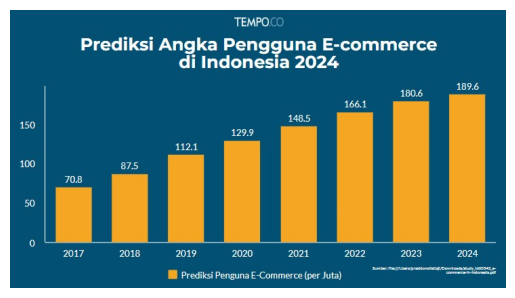

In [96]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab import files
drive.mount('/content/drive')
img = mpimg.imread('tempo.jpg')

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.show()


The rapid growth of the e-commerce market and the increase in internet users are the main factors causing fraud in e-commerce. In 2018, the e-commerce market in Indonesia was worth USD 50 billion and is predicted to reach USD 200 billion by 2026. Internet users increased from 560 million in 2018 to 835 million in 2023, with online shoppers growing by 73%.

Based on demandsage.com The e-commerce fraud detection market is estimated to reach $ 102.28 billion by the end of 2027.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


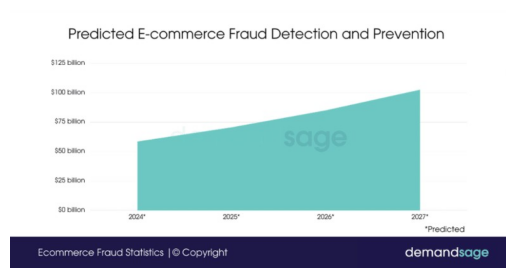

In [97]:
drive.mount('/content/drive')
img = mpimg.imread('Pred.jpg')

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.show()


Based on year-over-year history, there has been an increase of more than 50% in attacks compared to the previous year. However, only a slight increase has been observed in successful fraud attempts.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


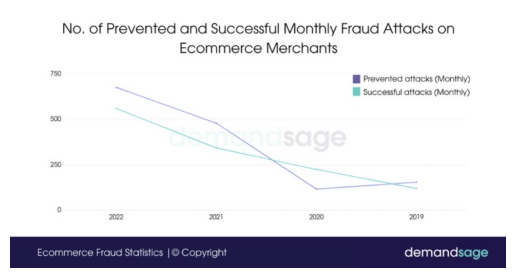

In [98]:
drive.mount('/content/drive')
img = mpimg.imread('No.jpg')

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.show()


63% of fraud costs incurred by e-commerce merchants in the United States were attributed to domestic transactions.
The remaining 37% were attributed to international fraud in the United States in 2022. This represents a significant decrease in domestic fraud compared to 71% recorded in 2021, while international fraud increased.

The largest proportion of fraud losses experienced by online merchants in the United States were due to friendly fraud.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


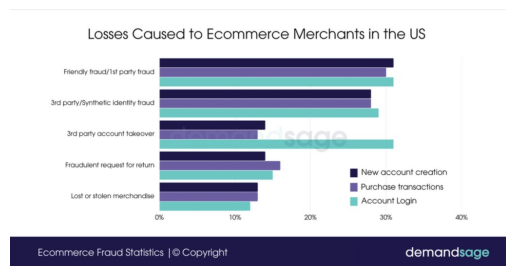

In [99]:
drive.mount('/content/drive')
img = mpimg.imread('Loss.jpg')

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis
plt.show()


This is a practice where consumers make purchases and then ask for a refund. The second largest part is synthetic fraud, where fraudsters create fake identities for the purpose of defrauding.

> Fraud di e-commerce include :

Phishing/Pharming/Whaling: Stealing confidential information such as credit card details and passwords, related to Cyber ​​Security Fraud such as account takeovers.

Card Testing: Testing stolen credit cards for validity, part of Cyber ​​Security Fraud.

Identity Theft: Theft of identity for fraud, including Cyber ​​Security Fraud.

First-party Misuse: Providing false information for illegal gain, related to Buyer Fraud (false claims, denied payments) and Merchant Fraud (counterfeit goods, non-compliance).

## A.1. Project Idea

In general, this project will attempt to implement several models until the best one is obtained.

- Logistic Regression: Very popular for fraud detection because its output is binary (fraud or non-fraud). This model works well for linearly separable datasets.

- Decision Trees: Provides an easily understandable interpretation in detecting patterns that lead to fraud. Can be used for binary classification (fraud or not) with splits based on transaction features.

- Random Forest: An ensemble model that combines several decision trees to improve accuracy. Useful for handling complex data and reducing the risk of overfitting.

- Support Vector Machines (SVM): Can optimally separate data to detect fraud, especially if the data is not linear. Can be used with kernels to accommodate various patterns present in the dataset.

- Gradient Boosting Machines (GBM): Such as XGBoost or LightGBM, very effective for detecting fraud patterns by addressing class imbalance in the dataset.

- K-Nearest Neighbors (KNN): Can be used to classify transactions as fraud based on proximity to similar transactions. This model is simple but can be efficient if the dataset is not too large.

- Neural Networks (Multilayer Perceptron): Can be used to detect complex non-linear patterns in fraud transactions. It is very powerful but requires more data and computation.

The models based on their purposes:

> 1. Classification of Fraud Campaign
Classifying campaigns related to fraudulent activities based on behavioral patterns and transaction characteristics.

Recommended Models:

Logistic Regression: Suitable for binary classification (fraud vs. non-fraud) and also provides the probability of fraud detection.
Random Forest: Utilizes multiple decision trees to enhance accuracy and recognize important features that influence fraud campaigns.
Gradient Boosting Machines (GBM): Useful for handling complex data with non-linear relationships.
Feature Processing:

Categorical Encoding: Encoding campaign categories (such as types of promotions) using methods like one-hot encoding or target encoding.
Feature Engineering: Create additional features such as frequency of promotion usage or campaigns per customer.


> 2. Fraud Technique Analysis
Analyzing fraud techniques used by perpetrators to exploit systems, such as card testing or identity theft.

Recommended Models:

Support Vector Machines (SVM): To separate hard-to-separate data linearly and detect complex fraud techniques.
Neural Networks (Multilayer Perceptron): Suitable for detecting complicated non-linear patterns in fraud techniques.
XGBoost: Combines several models to improve predictions for specific fraud techniques.
Feature Processing:

Time Series Analysis: Analyzing transaction times and possible fraud techniques that may occur within specific periods.
Anomaly Detection: Identifying fraud techniques based on anomalous patterns in the data.


> 3. Monitoring Fraud Trend
Monitoring fraud trends over time to identify increases in suspicious activity and anticipate potential risks.

Recommended Models:

Time Series Models: Such as ARIMA or Prophet to periodically monitor changes in fraud trends.
LSTM (Long Short-Term Memory): Suitable for detecting fraud patterns that depend on time.
Random Forest: Can be used to monitor trend variations based on historical features.
Feature Processing:

Temporal Feature Engineering: Using time-based features, such as hours, days, or months, to observe trend patterns.
Clustering: Segmenting fraud trends based on specific patterns such as geographical areas or types of fraud.


> 4. Fraud Ring GNN (Graph Neural Network)
Detecting fraud networks or fraud rings involving multiple interconnected perpetrators using graph analysis.

Recommended Models:

Graph Neural Networks (GNN): To analyze relationships between fraud perpetrators in complex networks.
DeepWalk or Node2Vec: Algorithms to represent nodes (perpetrators) in a fraud network to predict their involvement in fraud networks.
XGBoost: Can be used as an additional model to analyze features from graph representation.
Feature Processing:

Graph Feature Engineering: Creating graph-based features, such as degree centrality and clustering coefficient to identify key perpetrators in a fraud ring.
Network Analysis: Performing analysis on network structures to find fraud patterns related to actors within the fraud ring.


## A.2. The problem to be solved

First-party Misuse: Fraud where individuals or organizations intentionally provide false information for illegal gain. This relates to Buyer Fraud and Merchant Fraud, involving false claims, payment denials, fake accounts, promotion abuse, and the sale of counterfeit goods.

1. First-party Fraud has a significant impact on e-commerce businesses and financial institutions, including chargebacks, revenue declines, and coupon abuse.
2. Approximately 60% of chargebacks are caused by customers themselves.
3. Retail businesses experience a 2.4% decline in annual revenue due to this fraud.
4. 73% of e-commerce companies experience coupon abuse.
5. 70% of financial institutions report losses exceeding $500,000, with 62% of those losses coming from First-party Fraud.

Developing a Machine Learning model to predict and prevent First-party Fraud in e-commerce transactions by identifying suspicious activities that may indicate fraudulent behavior.

- Feature Classification of Fraud Campaign
Classifying campaigns related to fraudulent activities based on behavioral patterns and transaction characteristics.

- Feature Fraud Technique Analysis
Analyzing fraud techniques used by perpetrators to exploit systems, such as card testing or identity theft.

- Feature Monitoring Fraud Trend
Monitoring fraud trends over time to identify increases in suspicious activity and anticipate potential risks.

- Feature Fraud Ring GNN (Graph Neural Network)
Detecting fraud networks or fraud rings involving multiple interconnected perpetrators using graph analysis.


## A.3. Project Purposes

Project Purposes: Aimed at e-commerce companies and financial institutions looking to detect and prevent First-party Fraud and other frauds negatively impacting business.

Benefits and Business Impact:

Loss Reduction: Reducing the risk of chargebacks and fraud claims while protecting company revenue.
Increased Consumer Trust: Protecting customers from fraud, creating a safe transaction experience.
Operational Efficiency: Automating fraud detection, saving on manual monitoring costs.
Effective Use of Promotions: Preventing coupon and promotion abuse, optimizing marketing strategies.
Better Customer Experience: Enhancing transaction smoothness for legitimate customers.


## A.4. Project Impact

- Reduction of Fraud Losses: Mitigating the financial impact of First-party Fraud through early detection and prevention.
- Increased Accuracy: Enhancing fraud detection accuracy using machine learning (ML) models, thus reducing false positives and false negatives.
- Operational Efficiency: Streamlining the fraud detection process, reducing manual intervention, and speeding up response time.
- Reduction of Chargebacks: Improving profit margins by reducing chargebacks from 60% of cases caused by customer fraud.
- Revenue Enhancement: Avoiding a 2.4% decline in annual revenue for sellers.
- Reduction of Coupon Abuse: Decreasing coupon abuse by 73%.
- Cost Savings: Reducing fraud management costs currently reaching 10% of annual revenue.
- Customer Trust: Enhancing customer reputation and loyalty.
- Financial Security: Mitigating losses for financial institutions and improving financial health.


## A.5. Target User for Project

Main User

1. Fraud Prevention and Security Team
2. Risk Management Team
3. E-commerce Platform Managers
4. Financial Institutions


## A.6. Project Output

The output of this project is an interactive dashboard that allows users to detect fraud more easily with 4 main Features: Classification of Fraud Campaign Feature, Fraud Technique Analysis Feature, Fraud Trend Monitoring Feature, and Fraud Ring GNN (Graph Neural Network) Feature.


## A.7. Data Collection

1. Data Collection

This internal data is taken from one of the leading e-commerce platforms in Indonesia, which has been masked to protect sensitive information. This dataset contains information about transactions made by customers, used to analyze shopping behavior patterns and detect potential fraud. This data aligns with the project needs as it uses primary data from the field, which can provide more accurate results.


2. Data Description

In [100]:
drive.mount('/content/drive')
var = pd.read_csv(r'Variable.csv', encoding='latin-1')
var

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Variable,Data Type,Role,Description,Example
0,order_fe_status,String,Status,Status dari pemesanan pada platform,"TO_RECEIVE, CANCELLED, COMPLETED, TO_SHIP"
1,order_logistics_status,String,Logistics Status,Status logistik dari pengiriman,"PICKUP DONE, READY, DELIVERY FAILED, NOT STARTED"
2,actual_shipping_carrier,String,Shipping Carrier,Nama perusahaan pengiriman yang digunakan,"J&T Express, Shopee Xpress Standard, Anteraja"
3,fulfilment_channel_id,Integer,Fulfillment Channel,ID dari saluran pemenuhan,"80014, 80026, 80029, 80030"
4,fulfilment_shipping_carrier,String,Fulfillment Carrier,Nama carrier untuk pemenuhan,"J&T Economy, SiCepat REG, Indopaket"
5,payment_channel,String,Payment Method,Metode pembayaran yang digunakan,"COD (Bayar di Tempat), ShopeePay, Bank BCA"
6,pv_voucher_code,String,Voucher Code,Kode voucher untuk promosi atau diskon,"TSEL30B5F4UVKGR, WLCM10030X21FEB, SPLNUZAPR1"
7,pv_voucher_activity_name,String,Voucher Activity Name,Nama aktivitas terkait voucher,"MPRNNONB_Telkomsel_Regular_100%, MACQWELCOMEDD..."
8,buyer_status,String,Buyer Status,Status dari pembeli di platform,"Normal, Frozen, Banned, Delete"
9,order_id,Numeric,Identifier,ID unik untuk setiap pesanan,1.03E+14



## A.7. Data Preparation

1. Target and Predictor

Target Variable: Buyer Status  
Buyer Status is a category used to classify customers based on their behavior or account status. There are four possible classes:

- Frozen: Customer accounts are temporarily frozen, usually due to suspicious activity or policy violations.
- Banned: Customer accounts are permanently banned from the platform due to serious violations.
- Delete: Customer accounts are deleted, either by the customer themselves or by the system.
- Normal: Customer accounts are in an active state and can conduct transactions.

Predictor Features  
The following features are used to predict the Buyer Status category:

1. Address:  
   - The residential address of the customer, which may indicate geographical location or shopping behavior patterns.

2. Recipient Phone:  
   - Only the first 6 digits of the recipient's phone number. This can help identify customers based on area codes.

3. Zip Code:  
   - The zip code of the customer's location, which provides further information about the geographical area where they reside.

4. City:  
   - The name of the city where the customer lives. This can provide insights into customer demographics and preferences.

5. pv_voucher_activity_name:  
   - The name of the voucher activity used by the customer. This can indicate how often customers use vouchers or promotions.

Reasons for Choosing Predictor Features:  
These features were selected because they can provide useful insights into customer behavior and characteristics. Address, zip code, and city provide important geographical context in fraud risk analysis, while information about voucher activity can indicate potential abuse.

Development Options  
- Fuzzy Wuzzy:  
  - This algorithm can be used for standardization or grouping of text data. For example, if there are variations in the spelling of city names or addresses, this algorithm will help align the data so that analysis can be performed more effectively.








## B. Data Exploratory
## B.1. Data Preparation

In [101]:
# !pip install faker
# !pip install fuzzywuzzy
# !pip install Sastrawi
# !pip install pandas nltk

In [102]:
# data analysis
import numpy as np
import pandas as pd
from google.colab import drive

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# set seed
import random
random.seed(123)
np.random.seed(123)

# text processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

# untuk menyimpan dan memuat model
import pickle

# untuk memproses file Excel
import openpyxl

# untuk menghasilkan data palsu
from faker import Faker

# untuk pengkodean kategori dan pemodelan
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# untuk fuzzy matching dan analisis jaringan
import time
import networkx as nx
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from difflib import SequenceMatcher

# tambahan modul lain yang diperlukan
import csv
import glob
import itertools


In [103]:
drive.mount('/content/drive')
data = pd.read_csv(r'Third.csv', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-103-64cec206a985>:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'Third.csv', encoding='latin-1')


# B.2. Data Exploratory Analysis
## B2.1. Data Types

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65142 entries, 0 to 65141
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   order_id                     65142 non-null  int64  
 1   checkout_id                  65142 non-null  int64  
 2   order_sn                     65142 non-null  object 
 3   shipping_traceno             36761 non-null  object 
 4   grand_total                  65142 non-null  int64  
 5   cogs                         65142 non-null  int64  
 6   shop_id                      65142 non-null  int64  
 7   order_fe_status              65142 non-null  object 
 8   order_logistics_status       65142 non-null  object 
 9   specific_purchased_time      65142 non-null  object 
 10  Device_ID                    58593 non-null  object 
 11  actual_shipping_carrier      65142 non-null  object 
 12  fulfilment_channel_id        65142 non-null  int64  
 13  fulfilment_shipp

In [105]:
data.describe()

,order_id,checkout_id,grand_total,cogs,shop_id,fulfilment_channel_id,shopee_voucher_rebate,coin_earn,Buyer_User_ID,Seller_User_ID,recipient_phone,zip_code,seller_longitude,seller_latitude,buyer_longitude,buyer_latitude,sender_user_id,hashed_ba,registration_phone_number,Count If
count,6.514200e+04,6.514200e+04,6.514200e+04,6.514200e+04,6.514200e+04,65142.000000,65142.000000,65142.000000,6.514200e+04,6.514200e+04,6.514200e+04,65120.000000,406.000000,406.000000,403.000000,403.000000,0.0,0.0,6.021900e+04,62491.000000
mean,1.032190e+14,1.032190e+14,4.288170e+04,6.429180e+04,1.797163e+08,76399.849283,24755.629839,25.453670,7.388930e+08,1.797225e+08,9.512709e+12,47183.320224,114.822660,23.687192,108.146402,-4.215881,NaN,NaN,9.717997e+12,1.018179
std,1.383691e+11,1.383686e+11,1.493479e+05,2.454895e+05,1.563214e+08,16069.808922,11335.873985,583.911091,8.524980e+06,1.563280e+08,1.363616e+13,22635.662344,2.271254,3.355950,5.500421,3.840158,NaN,NaN,1.389865e+13,0.176891
min,1.029636e+14,1.029636e+14,0.000000e+00,0.000000e+00,1.057000e+04,8003.000000,0.000000,0.000000,7.000054e+08,1.057000e+04,8.216779e+09,10110.000000,105.000000,-7.000000,95.000000,-9.000000,NaN,NaN,1.825425e+10,1.000000
25%,1.031004e+14,1.031004e+14,7.500000e+03,3.125000e+04,4.351408e+07,80014.000000,15181.000000,0.000000,7.388269e+08,4.351547e+07,6.282118e+12,28825.000000,114.000000,23.000000,105.000000,-7.000000,NaN,NaN,6.282115e+12,1.000000
50%,1.032174e+14,1.032174e+14,2.200000e+04,4.500000e+04,1.435765e+08,80014.000000,30000.000000,0.000000,7.418412e+08,1.435784e+08,6.283878e+12,45252.000000,114.000000,23.000000,108.000000,-6.000000,NaN,NaN,6.283892e+12,1.000000
75%,1.033453e+14,1.033453e+14,4.900000e+04,7.000000e+04,2.814130e+08,80030.000000,30000.000000,0.000000,7.434966e+08,2.814197e+08,6.285876e+12,62311.500000,114.000000,23.000000,111.000000,-1.000000,NaN,NaN,6.285893e+12,1.000000
max,1.034514e+14,1.034514e+14,2.357239e+07,5.000000e+07,7.315251e+08,88020.000000,75000.000000,40000.000000,7.456823e+08,7.315447e+08,6.289976e+13,99962.000000,121.000000,31.000000,131.000000,6.000000,NaN,NaN,6.289618e+13,6.000000


In [106]:
data['order_id'] = data['order_id'].astype('Int64')
data['checkout_id'] = data['checkout_id'].astype('Int64')
data['grand_total'] = data['grand_total'].astype('Int64')
data['cogs'] = data['cogs'].astype('Int64')
data['shop_id'] = data['shop_id'].astype('Int64')
data['fulfilment_channel_id'] = data['fulfilment_channel_id'].astype('Int64')
data['Buyer_User_ID'] = data['Buyer_User_ID'].astype('Int64')
data['Seller_User_ID'] = data['Seller_User_ID'].astype('Int64')
data['recipient_phone'] = data['recipient_phone'].astype('Int64')
data['Count If'] = data['Count If'].astype('Int64')
# Tangani NaN sebelum mengubah tipe data
data['registration_phone_number'] = pd.to_numeric(data['registration_phone_number'], errors='coerce').astype('Int64')

# Ubah kolom waktu menjadi datetime
data['specific_purchased_time'] = pd.to_datetime(data['specific_purchased_time'], format='%Y-%m-%d %H:%M:%S')

# Ubah kolom float menjadi integer jika tidak ada nilai pecahan
data['zip_code'] = pd.to_numeric(data['zip_code'], errors='coerce').astype('Int64')


## B2.2. Missing Value

In [107]:
data.isna().sum()

,0
order_id,0
checkout_id,0
order_sn,0
shipping_traceno,28381
grand_total,0
cogs,0
shop_id,0
order_fe_status,0
order_logistics_status,0
specific_purchased_time,0


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65142 entries, 0 to 65141
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   order_id                     65142 non-null  Int64         
 1   checkout_id                  65142 non-null  Int64         
 2   order_sn                     65142 non-null  object        
 3   shipping_traceno             36761 non-null  object        
 4   grand_total                  65142 non-null  Int64         
 5   cogs                         65142 non-null  Int64         
 6   shop_id                      65142 non-null  Int64         
 7   order_fe_status              65142 non-null  object        
 8   order_logistics_status       65142 non-null  object        
 9   specific_purchased_time      65142 non-null  datetime64[ns]
 10  Device_ID                    58593 non-null  object        
 11  actual_shipping_carrier      65142 non-nu

## B2.3. Data Wrangling

In [109]:
data.drop(columns=['seller_latitude', 'seller_longitude', 'buyer_longitude', 'buyer_latitude', 'hashed_ba', 'Unnamed: 39', 'sender_user_id' ], inplace=True)

In [110]:
data.select_dtypes('number').corr()
corr_matrix = data.select_dtypes(include='number').corr()

In [111]:
def mask_value(val):
    if pd.isna(val):  # Periksa jika nilai NaN
        return val
    val = str(val)  # Pastikan semua nilai diubah ke string
    if len(val) > 4:
        return '****' + val[4:]  # Ganti 4 karakter pertama dengan '****'
    else:
        return '****'

# Kolom yang akan dimasking
cols_to_mask = [
    'order_id', 'checkout_id', 'order_sn', 'shipping_traceno', 'Device_ID', 'Username_Buyer',
    'Username_Seller', 'Buyer_User_ID', 'Seller_User_ID', 'recipient_phone', 'recipient_name',
    'shipping_address', 'shipping_city', 'zip_code', 'buyer_longitude', 'buyer_latitude',
    'seller_longitude', 'seller_latitude', 'registration_phone_number', 'cogs', 'grand_total', 'SZ', 'shop_id'
]

# Terapkan masking pada kolom yang membutuhkan
for col in cols_to_mask:
    if col in data.columns:  # Periksa apakah kolom ada di DataFrame
        if data[col].dtype == 'Int64':  # Tipe data object atau Int64
            data[col] = data[col].apply(mask_value)
        elif data[col].dtype == 'float64':  # Tipe data float64
            data[col] = data[col].astype('str').apply(mask_value)

## B2.4. Masking Data

In [112]:
data.head()

,order_id,checkout_id,order_sn,shipping_traceno,grand_total,cogs,shop_id,order_fe_status,order_logistics_status,specific_purchased_time,...,Seller_User_ID,recipient_phone,recipient_name,shipping_address,shipping_city,zip_code,registration_phone_number,SZ,Group,Count If
0,****97621228623,****97621284800,2204108N5SQ32F,JP5929909549,****00,****00,****5986,TO_RECEIVE,PICKUP DONE,2022-04-10 20:47:02,...,****7370,****333044826,Aldiinr,"Btn Lepo-Lepo Indah, RT.1/RW.1, Kel Wundudopi,...",KOTA KENDARI,****6.0,****333044826.0,'1491123671126906758,MPRNNONB_Telkomsel_Regular_100%_'1491123671126...,1
1,****51378688478,****51378625388,220412D4C48CEX,NaN,****,****0,****05142,TO_PAY,INVALID,2022-04-12 15:29:38,...,****09125,****2016723744,Nanda gustii,"Jl Marelan VI,psr 2 timur depan kolam renang T...",KOTA MEDAN,****6.0,****2016723744.0,NaN,NaN,<NA>
2,****74208315718,****74208361763,220408253JJ2A6,JP8423988280,****,****0000,****6016,TO_RECEIVE,PICKUP DONE,2022-04-08 06:43:29,...,****7477,****240268046,Sabina/Hasan,Jalan Leynan Umar Baki No. 137 ( Depan SIT Alf...,KOTA BINJAI,****8.0,****5401889327.0,'1430741364721454946,MGVWGRANDPRIZESHOP_'1430741364721454946_KOTA B...,1
3,****51371680118,****51371670424,220412D4BWJGBP,NaN,****,****0,****4510,TO_PAY,READY,2022-04-12 15:29:31,...,****5988,****849084556,Rizal Lm,Kedai Lombok (Rumah tingkat),KOTA YOGYAKARTA,****3.0,****849084556.0,NaN,NaN,<NA>
4,****51368345982,****51368318277,220412D4BTCRBX,NaN,****,****,****374,TO_PAY,READY,2022-04-12 15:29:29,...,****668,****195435211,Yulia,Toko pakaian KHANZA FASHION STORE deretan lari...,KAB. SEMARANG,****1.0,****195435211.0,NaN,NaN,<NA>


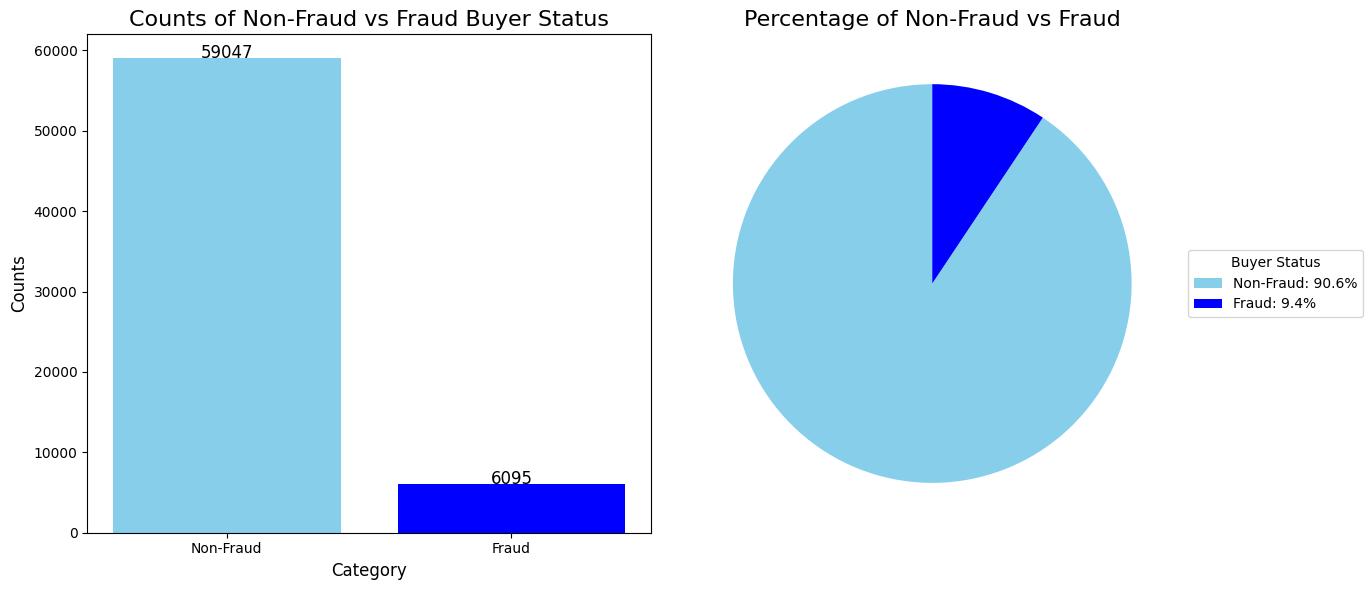

In [113]:
# Menghitung jumlah kemunculan setiap nilai unik di kolom 'buyer_status'
unique_values = data['buyer_status'].value_counts()

# Mengkategorikan 'buyer_status' menjadi 'Non-Fraud' jika 'Normal', dan 'Fraud' jika tidak
data['Fraud_Status'] = data['buyer_status'].apply(lambda x: 'Non-Fraud' if x == 'Normal' else 'Fraud')

# Menghitung jumlah masing-masing kategori
fraud_status_counts = data['Fraud_Status'].value_counts()

# Menghitung persentase untuk legend
fraud_status_percentages = (fraud_status_counts / fraud_status_counts.sum() * 100).round(1).astype(str) + '%'

# Membuat Bar Plot
plt.figure(figsize=(14, 6))

# Plot Bar di subplot 1
plt.subplot(1, 2, 1)
plt.bar(fraud_status_counts.index, fraud_status_counts.values, color=['skyblue', 'blue'])
plt.title('Counts of Non-Fraud vs Fraud Buyer Status', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Menambahkan angka di atas setiap bar
for index, value in enumerate(fraud_status_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12)

# Membuat Pie Chart di subplot 2
plt.subplot(1, 2, 2)
# Menghilangkan angka persentase dari pie chart
plt.pie(fraud_status_counts.values, startangle=90, colors=['skyblue', 'blue'])

# Menambahkan legend dengan kategori dan persentase
legend_labels = [f'{status}: {percentage}' for status, percentage in zip(fraud_status_counts.index, fraud_status_percentages)]
plt.legend(legend_labels, title="Buyer Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Non-Fraud vs Fraud', fontsize=16)

# Menampilkan plot
plt.tight_layout()
plt.show()

There are significantly more non-fraud cases (59,047) compared to fraud cases (6,095).90.6% of the cases are non-fraud, while 9.4% are fraud.The data indicates that the majority of the analyzed transactions or activities are non-fraudulent. Although the number of fraud cases is lower, the 9.4% percentage indicates that the risk of fraud remains significant.

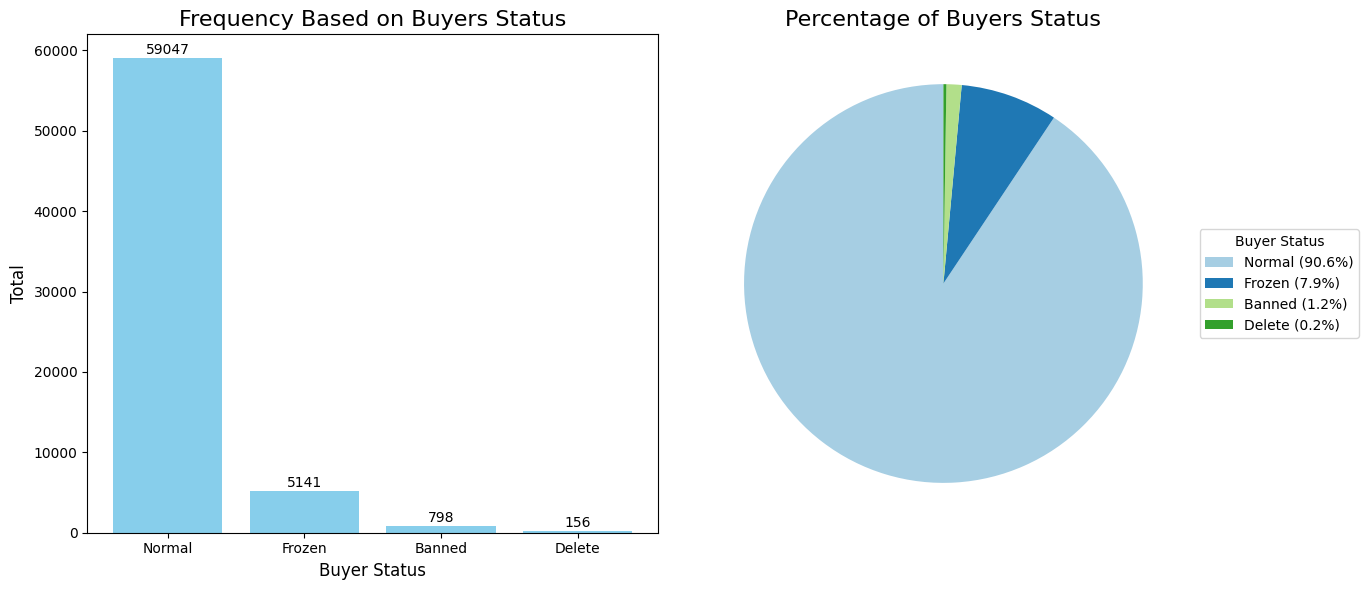

In [114]:
# Membuat figure dengan dua subplot: satu untuk bar plot, satu untuk pie chart
plt.figure(figsize=(14, 6))

# Membuat bar plot di subplot pertama
plt.subplot(1, 2, 1)
plt.bar(unique_values.index, unique_values.values, color='skyblue')
plt.title('Frequency Based on Buyers Status', fontsize=16)
plt.xlabel('Buyer Status', fontsize=12)
plt.ylabel('Total', fontsize=12)

# Menambahkan angka di atas setiap bar
for i, value in enumerate(unique_values.values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=10)

# Membuat pie chart di subplot kedua
plt.subplot(1, 2, 2)
# Menghilangkan label di pie chart
wedges = plt.pie(unique_values.values, startangle=90, colors=plt.cm.Paired.colors)

# Menambahkan legend dengan persentase
plt.legend(wedges[0],
           [f'{label} ({count / sum(unique_values.values) * 100:.1f}%)' for label, count in zip(unique_values.index, unique_values.values)],
           title="Buyer Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Percentage of Buyers Status', fontsize=16)

# Menampilkan kedua plot
plt.tight_layout()
plt.show()

The analysis shows that the majority of buyers maintain a Normal status, totaling 59,047, which constitutes 90.6% of all accounts, followed by Frozen at 5,141 (7.9%), Banned at 798 (1.2%), and Delete at 156 (0.2%). This indicates that most purchasing activities are running smoothly; however, the presence of Frozen and Banned cases highlights significant security risks, while the Delete status reflects that some buyers have chosen to remove their accounts. These findings suggest that the company must enhance its security measures to mitigate risks and address the reasons behind account deletions.

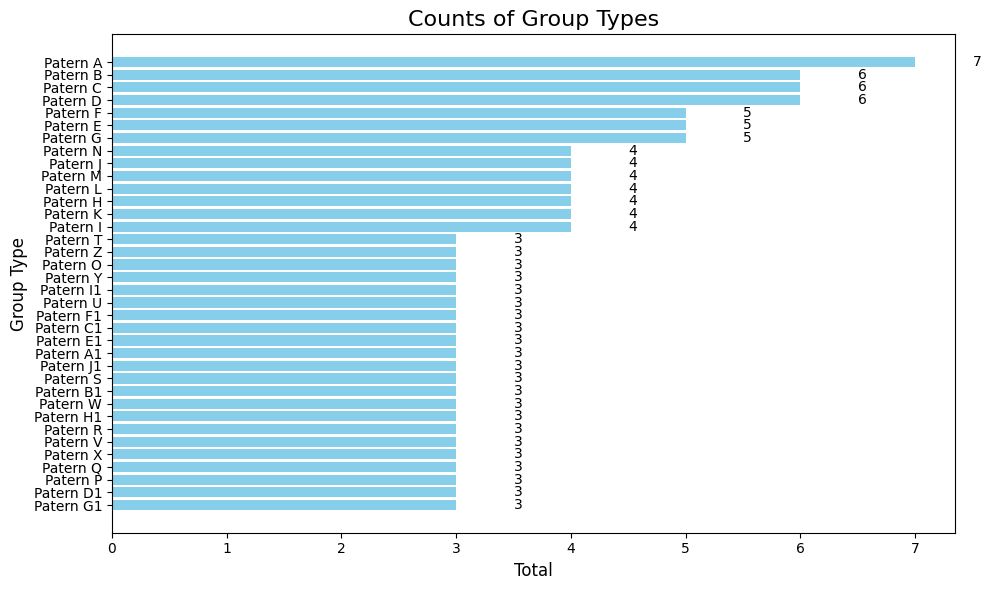

In [115]:
# Menghitung jumlah kemunculan setiap nilai di kolom 'Group'
group_counts = data['Group'].value_counts()

# Membuat mapping dari indeks unique ke alfabet dengan menambahkan kata 'Group'
def index_to_alphabet(index):
    if index < 26:
        return f"Patern {string.ascii_uppercase[index]}"  # Mengambil huruf sesuai urutan alfabet
    else:
        return f"Patern {string.ascii_uppercase[index % 26]}{index // 26}"

# Membuat mapping dari nilai group ke huruf berdasarkan urutan munculnya
group_mapping = {}
index = 0
for group, count in group_counts.items():
    # Hanya buat mapping jika count lebih dari 2, jika tidak kelompokkan sebagai 'Normal'
    if count > 2:
        group_mapping[group] = index_to_alphabet(index)
        index += 1
    else:
        group_mapping[group] = 'Normal'

# Membuat kolom baru 'Group Type' berdasarkan mapping
data['Group Type'] = data['Group'].map(group_mapping)

# Menghitung jumlah kemunculan setiap nilai di kolom 'Group Type', kecuali 'Normal'
group_type_counts = data['Group Type'].value_counts()
group_type_counts = group_type_counts[group_type_counts.index != 'Normal']
group_type_counts = group_type_counts.sort_values(ascending=True)

# Membuat DataFrame baru dari group_type_counts
group_type_df = group_type_counts.reset_index()
group_type_df.columns = ['Group Type', 'Total']
# Membuat bar plot vertikal dari DataFrame group_type_df
plt.figure(figsize=(10, 6))
plt.barh(group_type_df['Group Type'], group_type_df['Total'], color='skyblue')

# Menambahkan judul dan label
plt.title('Counts of Group Types', fontsize=16)
plt.xlabel('Total', fontsize=12)
plt.ylabel('Group Type', fontsize=12)

# Menambahkan angka di samping setiap bar
for index, value in enumerate(group_type_df['Total']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

The analysis of fraud patterns indicates that the "A" and "B" types significantly dominate in frequency compared to other types, with most remaining group types showing low frequencies, often below five. This asymmetric distribution, characterized by a longer right tail, suggests that "A" and "B" may represent larger populations with more common characteristics, while the other types are minority groups. These findings underscore the need for further investigation into the dominance of "A" and "B," as well as an exploration of the unique traits of minority groups. Additionally, segmenting the data by group type could enhance understanding of specific patterns and inform decisions in marketing, product development, and resource management.


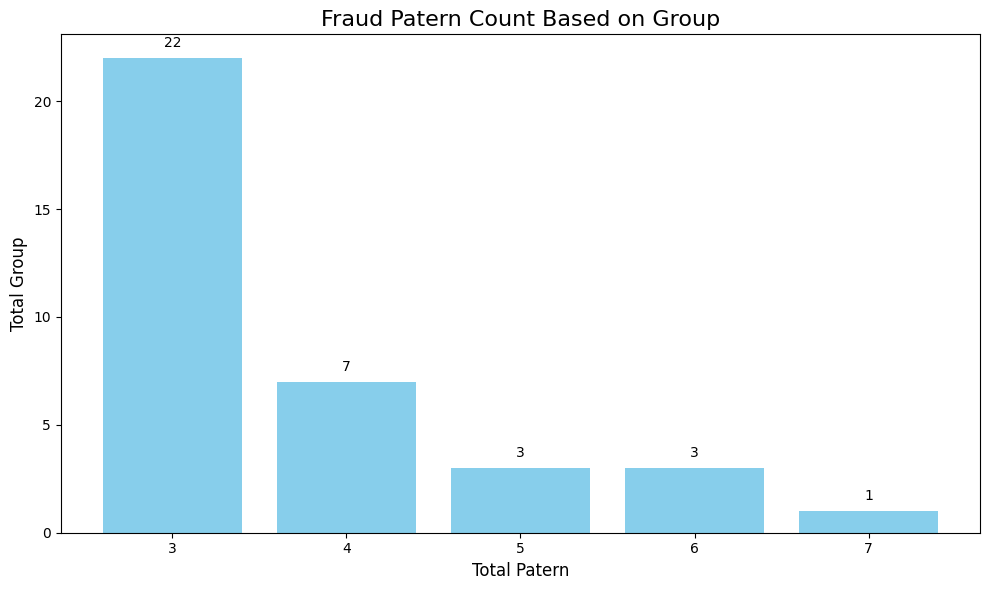

In [116]:
# Menghitung jumlah grup berdasarkan total
total_group_counts = group_type_df['Total'].value_counts().sort_index()

# Membuat DataFrame dari total_group_counts
total_group_df = total_group_counts.reset_index()
total_group_df.columns = ['Total', 'Group Count']

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_group_df['Total'], total_group_df['Group Count'], color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Fraud Patern Count Based on Group', fontsize=16)
plt.xlabel('Total Patern', fontsize=12)
plt.ylabel('Total Group', fontsize=12)
plt.xticks(total_group_df['Total'])  # Menampilkan semua total pada sumbu x

# Menambahkan angka di atas setiap bar
for index, value in enumerate(total_group_df['Group Count']):
    plt.text(total_group_df['Total'][index], value + 0.5, str(value), ha='center', fontsize=10)

plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


The fraud pattern analysis reveals that pattern 3 is the most prevalent, occurring more frequently than other patterns, while most incidents are concentrated in specific patterns (3, 4, 5, and 6). This suggests that pattern 3 likely represents the most common or easiest type of fraud to commit. The variety of patterns indicates that fraudsters use different strategies, with the less frequent patterns possibly representing more complex or specific fraud types.


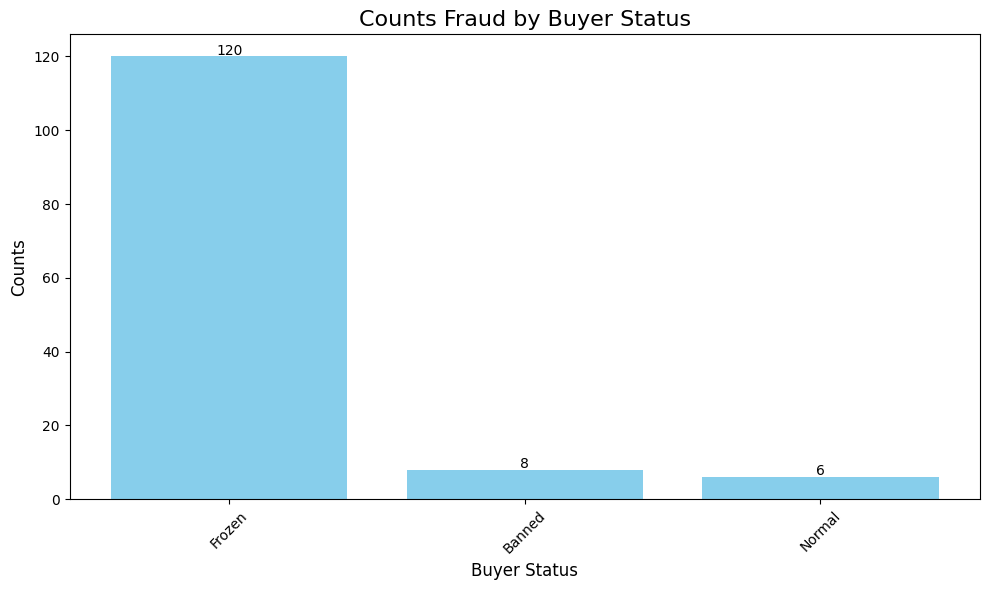

In [117]:
# Memfilter data hanya untuk 'Group' dengan value counts lebih dari 2
filtered_groups = group_counts[group_counts > 2].index

# Memfilter data asli berdasarkan hasil di atas
filtered_data = data[data['Group'].isin(filtered_groups)]

# Menghitung data berdasarkan 'buyer_status' setelah memfilter 'Group'
buyer_status_counts = filtered_data['buyer_status'].value_counts()

# Membuat bar plot untuk hasil
plt.figure(figsize=(10, 6))
plt.bar(buyer_status_counts.index, buyer_status_counts.values, color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Counts Fraud by Buyer Status', fontsize=16)
plt.xlabel('Buyer Status', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Menambahkan angka di atas setiap bar
for index, value in enumerate(buyer_status_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Menampilkan plot
plt.xticks(rotation=45)  # Rotasi label x untuk visibilitas lebih baik
plt.tight_layout()
plt.show()

The analysis of fraud counts by buyer status shows that most fraud cases occur in Frozen accounts, indicating a higher risk for fraudulent activity. While there are fewer cases in Banned accounts, this suggests that blocking measures may not be entirely effective. Additionally, some fraud cases in Normal accounts point to weaknesses in the fraud detection system. These findings highlight vulnerabilities in Frozen accounts and the need to reevaluate account blocking effectiveness, while also calling for enhancements in fraud detection systems to better identify fraud across all buyer statuses.



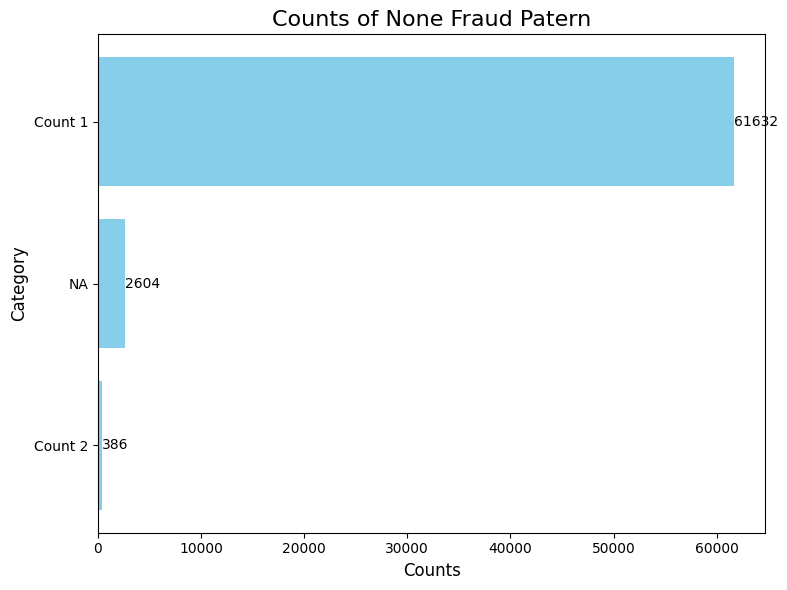

In [118]:
# Menghitung jumlah NA di kolom 'Group'
na_count = data['Group'].isna().sum()

# Menghitung value counts untuk kolom 'Group' dan filter untuk count 1 dan 2
value_counts = data['Group'].value_counts()
count_1 = value_counts[value_counts == 1].count()  # Menghitung jumlah grup dengan count 1
count_2 = value_counts[value_counts == 2].count()  # Menghitung jumlah grup dengan count 2

# Membuat DataFrame untuk visualisasi
counts_df = pd.DataFrame({
    'Category': ['NA', 'Count 1', 'Count 2'],
    'Counts': [na_count, count_1, count_2]
})

# Mengurutkan DataFrame berdasarkan 'Counts' dari yang tertinggi ke terendah
counts_df = counts_df.sort_values(by='Counts', ascending=True)

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.barh(counts_df['Category'], counts_df['Counts'], color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Counts of None Fraud Patern', fontsize=16)
plt.xlabel('Counts', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Menambahkan nilai di samping setiap bar
for index, value in enumerate(counts_df['Counts']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

The analysis of non-fraudulent patterns shows that most data is classified as (Count 1), indicating it is the most common pattern among legitimate activities. A significant portion is labeled as (NA), suggesting that some data could not be accurately categorized, while (Count 2) is rarely observed. This implies that (Count 1) represents expected normal transaction patterns, and the presence of (NA) highlights issues with data completeness. The rarity of (Count 2) may point to unusual behaviors. Therefore, further investigation is needed to understand (Count 1) characteristics, improve data quality to reduce (NA) instances, and explore (Count 2) as a potential indicator of anomalies.

# Evaluation Business Mentor

| **Kriteria**                                   | **Detail**                                                                                                                                                                                                                                                                                                                                                      | **Score** |
|------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|
| **LATAR BELAKANG**                            |                                                                                                                                                                                                                                                                                                                                                                    |           |
| Permasalahan yang ingin diselesaikan  (5 Poin)         | **Penilaian**: Background permasalahan yang diusulkan telah dijelaskan dengan baik, dimana masalah-masalah yang disebutkan merupakan masalah yang memiliki impact bagi berbagai perusahaan.<br>**Feedback**: Background menyederhanakan penyebab fraud dengan mengaitkannya dengan pertumbuhan e-commerce dan pengguna internet. Kenyataannya, penipuan didorong oleh berbagai faktor, seperti cybersecurity yang lemah, teknologi yang dimiliki pelaku penipuan, dan regulasi pada berbagai e-commerce. | 3         |
| **PENGUMPULAN DATA**                          |                                                                                                                                                                                                                                                                                                                                                                    |           |
| Teknik pengumpulan data (primer/sekunder)  (4 Poin)   | **Penilaian**: Data sudah berhasil didapatkan dalam bentuk csv, selain itu sudah melakukan proses masking untuk menjaga data yang sifatnya privasi.<br>**Feedback**: Dapat ditambahkan penjelasan mengenai data apa yang digunakan, darimana source dari data tersebut, dan penjelasan mengenai kolom-kolom yang terdapat pada dataset tersebut.                         | 3         |
| **PERSIAPAN DATA**                            |                                                                                                                                                                                                                                                                                                                                                                    |           |
| Tahapan eksplorasi data yang digunakan       (8 Poin)  | **Penilaian**: Proses eksplorasi sudah dilakukan dari beberapa komponen dari data.<br>**Feedback**:<ul><li>Proses identifikasi pattern pada transaksi fraud berdasarkan group perlu diberikan penjelasan lebih lanjut mengenai bagaimana proses, tujuan, serta hasil/insight apa yang diperoleh berdasarkan pengelompokkan pattern tersebut.</li><li>Beberapa aspek (kolom-kolom) lainnya pada data yang dapat memberikan indikasi untuk menentukan apakah suatu transaksi merupakan fraud atau tidak belum dieksplorasi dengan lebih dalam.</li></ul> | 4         |
| **Total Skor**                                |                                                                                                                                                                                                                                                                                                                                                                    | 10/17    |


# II. Technical Chaperon Phase

## C. Modeling and Tuning
## C.1.

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65142 entries, 0 to 65141
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   order_id                     65142 non-null  object        
 1   checkout_id                  65142 non-null  object        
 2   order_sn                     65142 non-null  object        
 3   shipping_traceno             36761 non-null  object        
 4   grand_total                  65142 non-null  object        
 5   cogs                         65142 non-null  object        
 6   shop_id                      65142 non-null  object        
 7   order_fe_status              65142 non-null  object        
 8   order_logistics_status       65142 non-null  object        
 9   specific_purchased_time      65142 non-null  datetime64[ns]
 10  Device_ID                    58593 non-null  object        
 11  actual_shipping_carrier      65142 non-nu

In [120]:
len(data)

65142

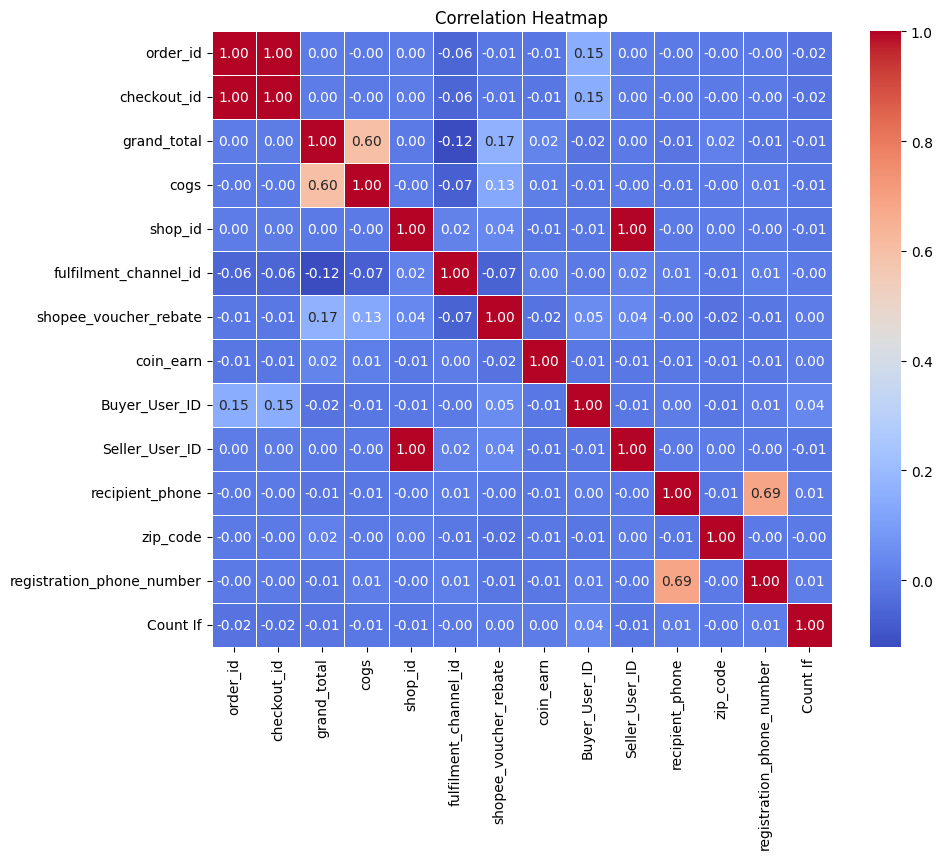

In [121]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

> **Fuzzy Wuzzy Full**

In [83]:
# start_time = time.time()

# print('Using the provided DataFrame')

# # Mengganti df dengan data
# data['shipping_address_x'] = data['shipping_address']
# data['shipping_address_z'] = data['shipping_address']
# data_list = [d for _, d in data.groupby(['shipping_city'])]

# newdata = []
# for d in data_list:
#     for category in d.shipping_address:
#         for master_category in d.shipping_address:
#             if fuzz.token_set_ratio(category, master_category) >= 80:
#                 newdata.append({"dish1": category, "dish2": master_category})
#                 break

# newdf = pd.DataFrame(newdata, columns=['dish1', 'dish2'])
# newdf = newdf.rename(columns={"dish1": "shipping_address_x"})
# newdf = newdf.rename(columns={"dish2": "shipping_address_z"})

# newdf2 = pd.merge(newdf, data[['order_id', 'order_sn', 'Buyer_User_ID', 'shipping_address',
#                              'shipping_address_x', 'shipping_address_z']], how="left", on="shipping_address_x")
# newdf2 = newdf2.rename(columns={"shipping_address_z_x": "shipping_address_z"})
# newdf2 = newdf2.drop_duplicates()
# newdf2 = pd.merge(newdf2, data[['order_id', 'order_sn', 'Buyer_User_ID', 'shipping_address',
#                               'shipping_address_x', 'shipping_address_z']], how="left", on="shipping_address_z")
# newdf2 = newdf2.drop_duplicates()
# newdf2 = newdf2.drop(columns=['order_id_x', 'shipping_address_x', 'shipping_address_z_y',
#                               'order_id_y', 'shipping_address_y', 'shipping_address_x_y'])
# newdf2 = newdf2.rename(columns={"Buyer_User_ID_x": "buyer_id_x"})
# newdf2 = newdf2.rename(columns={"Buyer_User_ID_y": "buyer_id_y"})
# newdf2 = newdf2.rename(columns={"buyer_address_x": "buyer_address_x"})
# newdf2 = newdf2.rename(columns={"shipping_address_z": "buyer_address_y"})
# newdf2 = newdf2.rename(columns={"shipping_city_x": "buyer_city_x"})
# newdf2 = newdf2.rename(columns={"shipping_city_y": "buyer_city_y"})

# G = nx.from_pandas_edgelist(newdf2, 'buyer_id_x', 'buyer_id_y')
# g = nx.connected_components(G)
# S = pd.Series()
# for i, n in enumerate(g):
#     s = pd.Series(sorted(list(n)), index=[i]*len(n))
#     S = pd.concat([S, s])

# result = pd.DataFrame(S)
# result = result.rename(columns={0: 'buyer_id_x'})
# result['group_number'] = S.index
# newdf3 = pd.merge(newdf2, result, how="left", on="buyer_id_x")
# pivot1 = newdf3.pivot_table(
#     values='buyer_id_x', index='group_number', aggfunc=pd.Series.nunique)
# newdf3 = pd.merge(newdf3, pivot1, how="left", on="group_number")
# newdf3 = newdf3.rename(columns={"buyer_id_x_y": "group_size"})
# newdf3 = newdf3.rename(columns={"buyer_id_x_x": "buyer_userid_x"})
# newdf3 = newdf3.drop(columns=['buyer_id_y', 'buyer_address_y'])

# newdf4 = newdf3.drop_duplicates(subset=['buyer_userid_x'], keep='first')
# newdf4 = newdf4[(newdf4.group_size >= 2)]
# newdf4 = newdf4.rename(columns={"order_sn_x": "order_sn"})
# newdf4 = newdf4.rename(columns={"group_number": "fuzzy_group_number"})
# newdf4 = newdf4.rename(columns={"group_size": "fuzzy_group_size"})
# data = data.merge(newdf4[['order_sn', 'fuzzy_group_number',
#                       'fuzzy_group_size']], on='order_sn', how='left')

# e_dataframe = pd.DataFrame(dataf)
# e_dataframe.to_excel('ResultFuzzy2.xlsx')

# print("Fuzzy Wuzzy Successfully")
# print("Process finished --- %s seconds ---" % (time.time() - start_time))


Using the provided DataFrame
Fuzzy Wuzzy Successfully
Process finished --- 5316.946609258652 seconds ---


In [88]:
# Misalkan df adalah DataFrame yang ingin Anda unduh
# dataf.to_csv('datafuzzy.csv', index=False)

# Menggunakan Google Colab untuk mengunduh file
# from google.colab import files
# files.download('datafuzzy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [144]:
drive.mount('/content/drive')
dataf = pd.read_csv(r'datafuzzy.csv', encoding='latin-1')
dataf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,checkout_id,order_sn,shipping_traceno,grand_total,cogs,shop_id,order_fe_status,order_logistics_status,specific_purchased_time,...,registration_phone_number,SZ,Group,Count If,Fraud_Status,Group Type,shipping_address_x,shipping_address_z,fuzzy_group_number,fuzzy_group_size
0,****97621228623,****97621284800,2204108N5SQ32F,JP5929909549,****00,****00,****5986,TO_RECEIVE,PICKUP DONE,2022-04-10 20:47:02,...,****333044826.0,'1491123671126906758,MPRNNONB_Telkomsel_Regular_100%_'1491123671126...,1.0,Non-Fraud,Normal,"Btn Lepo-Lepo Indah, RT.1/RW.1, Kel Wundudopi,...","Btn Lepo-Lepo Indah, RT.1/RW.1, Kel Wundudopi,...",NaN,NaN
1,****51378688478,****51378625388,220412D4C48CEX,NaN,****,****0,****05142,TO_PAY,INVALID,2022-04-12 15:29:38,...,****2016723744.0,NaN,NaN,NaN,Non-Fraud,NaN,"Jl Marelan VI,psr 2 timur depan kolam renang T...","Jl Marelan VI,psr 2 timur depan kolam renang T...",29895.0,2.0
2,****74208315718,****74208361763,220408253JJ2A6,JP8423988280,****,****0000,****6016,TO_RECEIVE,PICKUP DONE,2022-04-08 06:43:29,...,****5401889327.0,'1430741364721454946,MGVWGRANDPRIZESHOP_'1430741364721454946_KOTA B...,1.0,Non-Fraud,Normal,Jalan Leynan Umar Baki No. 137 ( Depan SIT Alf...,Jalan Leynan Umar Baki No. 137 ( Depan SIT Alf...,NaN,NaN
3,****51371680118,****51371670424,220412D4BWJGBP,NaN,****,****0,****4510,TO_PAY,READY,2022-04-12 15:29:31,...,****849084556.0,NaN,NaN,NaN,Non-Fraud,NaN,Kedai Lombok (Rumah tingkat),Kedai Lombok (Rumah tingkat),NaN,NaN
4,****51368345982,****51368318277,220412D4BTCRBX,NaN,****,****,****374,TO_PAY,READY,2022-04-12 15:29:29,...,****195435211.0,NaN,NaN,NaN,Non-Fraud,NaN,Toko pakaian KHANZA FASHION STORE deretan lari...,Toko pakaian KHANZA FASHION STORE deretan lari...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65137,****91844356054,****91844318773,2204095JND13XP,NaN,****4,****0,****2819,TO_SHIP,READY,2022-04-09 15:24:05,...,****363369279.0,'1399600222766463072,MACQAFFILIATEKOLSP_'1399600222766463072_KOTA B...,1.0,Non-Fraud,Normal,"Kavling Saguba Asri, Blok d No.132, RT.2/RW.17...","Kavling Saguba Asri, Blok d No.132, RT.2/RW.17...",NaN,NaN
65138,****02777287765,****02777238703,2204108SYEWH2N,NaN,****3,****0,****51117,TO_SHIP,INVALID,2022-04-10 22:12:59,...,****5614031787.0,'1399592028554826494,MACQAFFILIATEKOLSP_'1399592028554826494_KAB. K...,1.0,Fraud,Normal,"Puskesmas Alah Air, Jalan Puskesmas, Desa Alah...","Puskesmas Alah Air, Jalan Puskesmas, Desa Alah...",3985.0,30.0
65139,****93040397746,****93040359774,2204095KS1NDDJ,NaN,****8,****0,****29176,TO_SHIP,READY,2022-04-09 15:44:00,...,****173341631.0,'1399279041844705712,MACQAFFILIATEKOLSP_'1399279041844705712_KAB. C...,1.0,Non-Fraud,Normal,DESA KAPETAKAN KIDUL DEWI CELL,DESA KAPETAKAN KIDUL DEWI CELL,NaN,NaN
65140,****54992227224,****54992291538,220411AAKJY0VR,JP2168283178,****,****0,****2819,TO_SHIP,REQUEST CREATED,2022-04-11 12:43:13,...,****129013761.0,'1399273574223187523,MACQAFFILIATEKOLSP_'1399273574223187523_KOTA C...,1.0,Non-Fraud,Normal,"Jl. Encep Kartawiria, Gg. Amil, Rt 02/Rw 07, C...","Jl. Encep Kartawiria, Gg. Amil, Rt 02/Rw 07, C...",NaN,NaN


> **Text Preprocessing**

In [123]:
data['word_count'] = data['shipping_address'].astype(str).str.split().apply(len)

# Menampilkan total kata untuk setiap baris
print(data[['shipping_address', 'word_count']])

# Jika kamu ingin menghitung total kata dari seluruh kolom
total_words = data['word_count'].sum()
print("Total kata di seluruh kolom 'shipping_address':", total_words)

                                        shipping_address  word_count
0      Btn Lepo-Lepo Indah, RT.1/RW.1, Kel Wundudopi,...          10
1      Jl Marelan VI,psr 2 timur depan kolam renang T...          14
2      Jalan Leynan Umar Baki No. 137 ( Depan SIT Alf...          13
3                           Kedai Lombok (Rumah tingkat)           4
4      Toko pakaian KHANZA FASHION STORE deretan lari...          13
...                                                  ...         ...
65137  Kavling Saguba Asri, Blok d No.132, RT.2/RW.17...          10
65138  Puskesmas Alah Air, Jalan Puskesmas, Desa Alah...          10
65139                     DESA KAPETAKAN KIDUL DEWI CELL           5
65140  Jl. Encep Kartawiria, Gg. Amil, Rt 02/Rw 07, C...           9
65141  Jalan Pangolahan, RT.8/RW.4, Desa Karangmulya,...           6

[65142 rows x 2 columns]
Total kata di seluruh kolom 'shipping_address': 620757


In [124]:
# Gabungkan semua teks dalam kolom 'address_shipping' menjadi satu string besar
all_words = ' '.join(data['shipping_address'].astype(str))

# Pisahkan teks menjadi daftar kata-kata
word_list = all_words.split()

# Hapus kata-kata yang duplikat dengan mengubahnya menjadi set
unique_words = set(word_list)

# Hitung jumlah total kata yang tidak duplikat
total_unique_words = len(unique_words)

# Tampilkan hasil
print("Total kata tidak duplikat:", total_unique_words)

Total kata tidak duplikat: 118186


In [125]:
data['text_lower'] = data['shipping_address'].str.lower()
data.head()

,order_id,checkout_id,order_sn,shipping_traceno,grand_total,cogs,shop_id,order_fe_status,order_logistics_status,specific_purchased_time,...,shipping_city,zip_code,registration_phone_number,SZ,Group,Count If,Fraud_Status,Group Type,word_count,text_lower
0,****97621228623,****97621284800,2204108N5SQ32F,JP5929909549,****00,****00,****5986,TO_RECEIVE,PICKUP DONE,2022-04-10 20:47:02,...,KOTA KENDARI,****6.0,****333044826.0,'1491123671126906758,MPRNNONB_Telkomsel_Regular_100%_'1491123671126...,1,Non-Fraud,Normal,10,"btn lepo-lepo indah, rt.1/rw.1, kel wundudopi,..."
1,****51378688478,****51378625388,220412D4C48CEX,NaN,****,****0,****05142,TO_PAY,INVALID,2022-04-12 15:29:38,...,KOTA MEDAN,****6.0,****2016723744.0,NaN,NaN,<NA>,Non-Fraud,NaN,14,"jl marelan vi,psr 2 timur depan kolam renang t..."
2,****74208315718,****74208361763,220408253JJ2A6,JP8423988280,****,****0000,****6016,TO_RECEIVE,PICKUP DONE,2022-04-08 06:43:29,...,KOTA BINJAI,****8.0,****5401889327.0,'1430741364721454946,MGVWGRANDPRIZESHOP_'1430741364721454946_KOTA B...,1,Non-Fraud,Normal,13,jalan leynan umar baki no. 137 ( depan sit alf...
3,****51371680118,****51371670424,220412D4BWJGBP,NaN,****,****0,****4510,TO_PAY,READY,2022-04-12 15:29:31,...,KOTA YOGYAKARTA,****3.0,****849084556.0,NaN,NaN,<NA>,Non-Fraud,NaN,4,kedai lombok (rumah tingkat)
4,****51368345982,****51368318277,220412D4BTCRBX,NaN,****,****,****374,TO_PAY,READY,2022-04-12 15:29:29,...,KAB. SEMARANG,****1.0,****195435211.0,NaN,NaN,<NA>,Non-Fraud,NaN,13,toko pakaian khanza fashion store deretan lari...


In [192]:
sample_text = data['text_lower'][111]
sample_text

'perumnas talang kelapa, blok 6 no.48, rt.42/rw.9, talang kelapa, alang-alang lebar'

In [195]:
def text_cleansing(text):
    # Menghapus informasi dalam tanda kurung
    text = re.sub(r'\(.*?\)', '', text)

    # Menghapus karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Menjaga nomor rumah, RT, dan RW tetap ada.
    # Kita tidak akan menghapus angka yang berada setelah 'No.', 'RT', dan 'RW'.
    # text = re.sub(r'\b(?!No\.\d+|RT\.\d+|RW\.\d+)\b\d{1,4}', '', text)

    # Menghapus tanda baca yang tidak diperlukan (titik, koma, dan tanda baca lainnya)
    text = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', text)

    # Menghapus spasi berlebih di antara kata
    text = re.sub('\s+', ' ', text)

    # Menghapus spasi di awal dan akhir kalimat
    text = text.strip()

    return text

In [196]:
sample_text_clean = text_cleansing(sample_text)
sample_text_clean

'perumnas talang kelapa blok 6 no 48 rt 42 rw 9 talang kelapa alang alang lebar'

In [138]:
data['text_clean'] = data['text_lower'].apply(lambda x: text_cleansing(x))
data.head()

,order_id,checkout_id,order_sn,shipping_traceno,grand_total,cogs,shop_id,order_fe_status,order_logistics_status,specific_purchased_time,...,zip_code,registration_phone_number,SZ,Group,Count If,Fraud_Status,Group Type,word_count,text_lower,text_clean
0,****97621228623,****97621284800,2204108N5SQ32F,JP5929909549,****00,****00,****5986,TO_RECEIVE,PICKUP DONE,2022-04-10 20:47:02,...,****6.0,****333044826.0,'1491123671126906758,MPRNNONB_Telkomsel_Regular_100%_'1491123671126...,1,Non-Fraud,Normal,10,"btn lepo-lepo indah, rt.1/rw.1, kel wundudopi,...",btn lepo lepo indah rt 1 rw 1 kel wundudopi ba...
1,****51378688478,****51378625388,220412D4C48CEX,NaN,****,****0,****05142,TO_PAY,INVALID,2022-04-12 15:29:38,...,****6.0,****2016723744.0,NaN,NaN,<NA>,Non-Fraud,NaN,14,"jl marelan vi,psr 2 timur depan kolam renang t...",jl marelan vi psr 2 timur depan kolam renang t...
2,****74208315718,****74208361763,220408253JJ2A6,JP8423988280,****,****0000,****6016,TO_RECEIVE,PICKUP DONE,2022-04-08 06:43:29,...,****8.0,****5401889327.0,'1430741364721454946,MGVWGRANDPRIZESHOP_'1430741364721454946_KOTA B...,1,Non-Fraud,Normal,13,jalan leynan umar baki no. 137 ( depan sit alf...,jalan leynan umar baki no 137 payaroba binjai ...
3,****51371680118,****51371670424,220412D4BWJGBP,NaN,****,****0,****4510,TO_PAY,READY,2022-04-12 15:29:31,...,****3.0,****849084556.0,NaN,NaN,<NA>,Non-Fraud,NaN,4,kedai lombok (rumah tingkat),kedai lombok
4,****51368345982,****51368318277,220412D4BTCRBX,NaN,****,****,****374,TO_PAY,READY,2022-04-12 15:29:29,...,****1.0,****195435211.0,NaN,NaN,<NA>,Non-Fraud,NaN,13,toko pakaian khanza fashion store deretan lari...,toko pakaian khanza fashion store deretan lari...


In [148]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/kamusalay.csv'
normalized_word = pd.read_csv(file_path, header=None, encoding='latin-1')
data_dict = dict(zip(normalized_word[0], normalized_word[1]))
len(data_dict)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


15183

In [149]:
def normalize_text(text):
    # temporary list
    result = []

    # split sentence into list of words
    split_text = text.split()

    # loop for each word
    for word in split_text:
        new_word = data_dict.get(word, word) # return normalized word if it exists in the dictionary
        result.append(new_word)

    # combine list of words into sentence
    combine_text = ' '.join(result)

    return combine_text

In [155]:
sample_text_clean

'jl marelan vi psr 2 timur depan kolam renang tirta marelan gg keluarga link 23'

In [154]:
sample_text_normalized = normalize_text(sample_text_clean)
sample_text_normalized

'jalan marelan vi pasar 2 timur depan kolam renang tirta marelan gang keluarga link 23'

In [158]:
data['text_normalized'] = data['text_clean'].apply(lambda x: normalize_text(x))

In [159]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [160]:
sample_text_normalized

'jalan marelan vi pasar 2 timur depan kolam renang tirta marelan gang keluarga link 23'

In [161]:
sample_text_stemmed = stemmer.stem(sample_text_normalized)
sample_text_stemmed

'jalan marelan vi pasar 2 timur depan kolam renang tirta marelan gang keluarga link 23'

In [162]:
data['text_stemmed'] = data['text_normalized'].apply(lambda x: stemmer.stem(x))
data.head()

,order_id,checkout_id,order_sn,shipping_traceno,grand_total,cogs,shop_id,order_fe_status,order_logistics_status,specific_purchased_time,...,SZ,Group,Count If,Fraud_Status,Group Type,word_count,text_lower,text_clean,text_normalized,text_stemmed
0,****97621228623,****97621284800,2204108N5SQ32F,JP5929909549,****00,****00,****5986,TO_RECEIVE,PICKUP DONE,2022-04-10 20:47:02,...,'1491123671126906758,MPRNNONB_Telkomsel_Regular_100%_'1491123671126...,1,Non-Fraud,Normal,10,"btn lepo-lepo indah, rt.1/rw.1, kel wundudopi,...",btn lepo lepo indah rt 1 rw 1 kel wundudopi ba...,btn lepo lepo indah RT 1 RW 1 keluarga wundudo...,btn lepo lepo indah rt 1 rw 1 keluarga wundudo...
1,****51378688478,****51378625388,220412D4C48CEX,NaN,****,****0,****05142,TO_PAY,INVALID,2022-04-12 15:29:38,...,NaN,NaN,<NA>,Non-Fraud,NaN,14,"jl marelan vi,psr 2 timur depan kolam renang t...",jl marelan vi psr 2 timur depan kolam renang t...,jalan marelan vi pasar 2 timur depan kolam ren...,jalan marelan vi pasar 2 timur depan kolam ren...
2,****74208315718,****74208361763,220408253JJ2A6,JP8423988280,****,****0000,****6016,TO_RECEIVE,PICKUP DONE,2022-04-08 06:43:29,...,'1430741364721454946,MGVWGRANDPRIZESHOP_'1430741364721454946_KOTA B...,1,Non-Fraud,Normal,13,jalan leynan umar baki no. 137 ( depan sit alf...,jalan leynan umar baki no 137 payaroba binjai ...,jalan leynan umar baki no 137 payaroba binjai ...,jalan leynan umar baki no 137 payaroba binjai ...
3,****51371680118,****51371670424,220412D4BWJGBP,NaN,****,****0,****4510,TO_PAY,READY,2022-04-12 15:29:31,...,NaN,NaN,<NA>,Non-Fraud,NaN,4,kedai lombok (rumah tingkat),kedai lombok,kedai lombok,kedai lombok
4,****51368345982,****51368318277,220412D4BTCRBX,NaN,****,****,****374,TO_PAY,READY,2022-04-12 15:29:29,...,NaN,NaN,<NA>,Non-Fraud,NaN,13,toko pakaian khanza fashion store deretan lari...,toko pakaian khanza fashion store deretan lari...,toko pakaian khanza fashion store deretan lari...,toko pakai khanza fashion store deret laris la...


In [163]:
# Misalkan df adalah DataFrame yang ingin Anda unduh
#data.to_csv('datat.csv', index=False)

# Menggunakan Google Colab untuk mengunduh file
#from google.colab import files
#files.download('datat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
list_stopwords = stopwords.words('indonesian')
len(list_stopwords)

758

In [165]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in list_stopwords])

In [166]:
sample_text_stemmed

'jalan marelan vi pasar 2 timur depan kolam renang tirta marelan gang keluarga link 23'

In [167]:
remove_stopwords(sample_text_stemmed)

'jalan marelan vi pasar 2 timur kolam renang tirta marelan gang keluarga link 23'

In [200]:
drive.mount('/content/drive')
datat = pd.read_csv(r'datat.csv', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
# Terapkan fungsi ke kolom 'text_stemmed'
datat['text_no_stopwords'] = datat['text_stemmed'].apply(lambda x: remove_stopwords(x))

In [203]:
def remove_stopwords(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word not in list_stopwords])
    return text


datat['text_no_stopwords'] = datat['text_stemmed'].apply(remove_stopwords)


datat = datat[datat['text_no_stopwords'].notna()]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(datat['text_no_stopwords'])
X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [204]:
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

docterm

,00,000,0000009,00001,000011,000012,000013,000015,000016,00004,...,zubir,zuhdi,zul,zulfa,zulkifli,zumala,zumuran,zuraidah,zuri,zuriyah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Misalkan df adalah DataFrame yang ingin Anda unduh
docterm.to_csv('docterm.csv', index=False)

# Menggunakan Google Colab untuk mengunduh file
from google.colab import files
files.download('docterm.csv')

In [205]:
term_sum = docterm.sum(axis=0)
term_sum.sort_values(ascending=False)

,0
jalan,43529
rt,36538
rw,33663
no,17067
desa,12128
...,...
kawatuna,1
kawasen,1
kawasaki,1
kawaron,1


In [206]:
sum(term_sum == 1)

24557

(-0.5, 399.5, 199.5, -0.5)

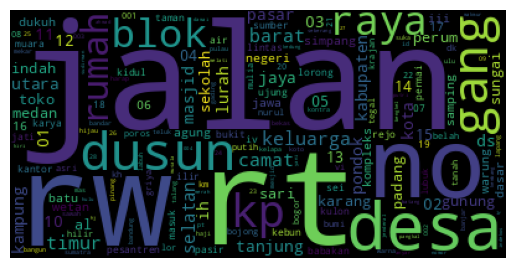

In [207]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(term_sum)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

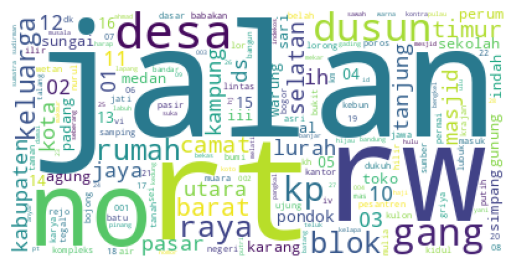

In [208]:
wordcloud = WordCloud(background_color='white').generate_from_frequencies(term_sum)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

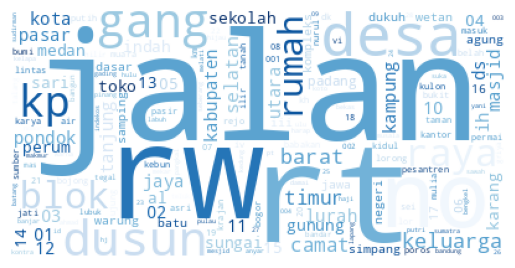

In [209]:
wordcloud = WordCloud(background_color='white', colormap='Blues').generate_from_frequencies(term_sum)
plt.imshow(wordcloud)
plt.axis("off")

> **Modelling**

In [ ]:
n = len(data)

n_test = int(n * 0.2)
n_train = n - n_test
n

65142

In [ ]:
n_test, n_train

(13028, 52114)